<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n30.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.346315,92.079798,-0.013876,128.412237,128.425916,-0.013679
1,0.0,1.0,73.088346,57.134171,-0.014425,140.208092,140.219323,-0.011231
2,0.0,2.0,74.803853,81.185756,-0.008377,165.981232,165.988795,-0.007563
3,0.0,3.0,91.536241,30.853634,0.014181,132.404056,132.384270,0.019786
4,0.0,4.0,76.404584,47.434709,-0.022305,133.816988,133.835176,-0.018188
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.221897,75.093328,-0.017734,128.297490,128.312991,-0.015501
29996,999.0,26.0,61.010869,60.493879,0.004907,131.509655,131.505992,0.003663
29997,999.0,27.0,52.085959,21.662459,0.024920,83.773339,83.760863,0.012476
29998,999.0,28.0,69.071681,40.303131,0.015772,119.390584,119.381439,0.009145


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.346315  92.079798 -0.013876  128.412237  128.425916 -0.013679
      1.0    73.088346  57.134171 -0.014425  140.208092  140.219323 -0.011231
      2.0    74.803853  81.185756 -0.008377  165.981232  165.988795 -0.007563
      3.0    91.536241  30.853634  0.014181  132.404056  132.384270  0.019786
      4.0    76.404584  47.434709 -0.022305  133.816988  133.835176 -0.018188
...                ...        ...       ...         ...         ...       ...
999.0 25.0   43.221897  75.093328 -0.017734  128.297490  128.312991 -0.015501
      26.0   61.010869  60.493879  0.004907  131.509655  131.505992  0.003663
      27.0   52.085959  21.662459  0.024920   83.773339   83.760863  0.012476
      28.0   69.071681  40.303131  0.015772  119.390584  119.381439  0.009145
      29.0   79.645125  81.539365 -0.002437  171.182053  171.179185  0.002868

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.346315  92.079798 -0.013876  128.412237  128.425916 -0.013679
      1.0    73.088346  57.134171 -0.014425  140.208092  140.219323 -0.011231
      2.0    74.803853  81.185756 -0.008377  165.981232  165.988795 -0.007563
      3.0    91.536241  30.853634  0.014181  132.404056  132.384270  0.019786
      4.0    76.404584  47.434709 -0.022305  133.816988  133.835176 -0.018188
...                ...        ...       ...         ...         ...       ...
999.0 25.0   43.221897  75.093328 -0.017734  128.297490  128.312991 -0.015501
      26.0   61.010869  60.493879  0.004907  131.509655  131.505992  0.003663
      27.0   52.085959  21.662459  0.024920   83.773339   83.760863  0.012476
      28.0   69.071681  40.303131  0.015772  119.390584  119.381439  0.009145
      29.0   79.645125  81.539365 -0.002437  171.182053  171.179185  0.002868

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.346315,92.079798,-0.013876,128.412237,128.425916,-0.013679
1,0.0,1.0,73.088346,57.134171,-0.014425,140.208092,140.219323,-0.011231
2,0.0,2.0,74.803853,81.185756,-0.008377,165.981232,165.988795,-0.007563
3,0.0,3.0,91.536241,30.853634,0.014181,132.404056,132.384270,0.019786
4,0.0,4.0,76.404584,47.434709,-0.022305,133.816988,133.835176,-0.018188
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.221897,75.093328,-0.017734,128.297490,128.312991,-0.015501
29996,999.0,26.0,61.010869,60.493879,0.004907,131.509655,131.505992,0.003663
29997,999.0,27.0,52.085959,21.662459,0.024920,83.773339,83.760863,0.012476
29998,999.0,28.0,69.071681,40.303131,0.015772,119.390584,119.381439,0.009145


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.346315  92.079798 -0.013876  128.412237  128.425916 -0.013679
      1.0    73.088346  57.134171 -0.014425  140.208092  140.219323 -0.011231
      2.0    74.803853  81.185756 -0.008377  165.981232  165.988795 -0.007563
      3.0    91.536241  30.853634  0.014181  132.404056  132.384270  0.019786
      4.0    76.404584  47.434709 -0.022305  133.816988  133.835176 -0.018188
...                ...        ...       ...         ...         ...       ...
999.0 25.0   43.221897  75.093328 -0.017734  128.297490  128.312991 -0.015501
      26.0   61.010869  60.493879  0.004907  131.509655  131.505992  0.003663
      27.0   52.085959  21.662459  0.024920   83.773339   83.760863  0.012476
      28.0   69.071681  40.303131  0.015772  119.390584  119.381439  0.009145
      29.0   79.645125  81.539365 -0.002437  171.182053  171.179185  0.002868

[30000 rows x 6 columns]

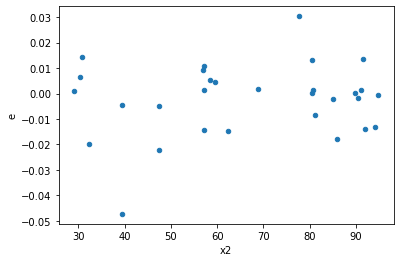

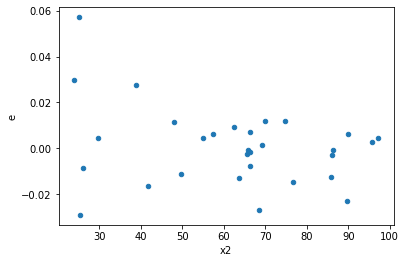

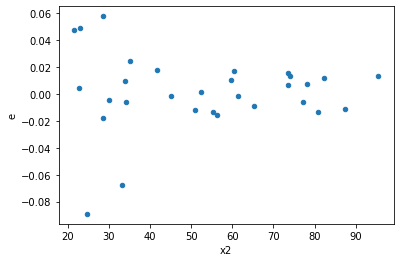

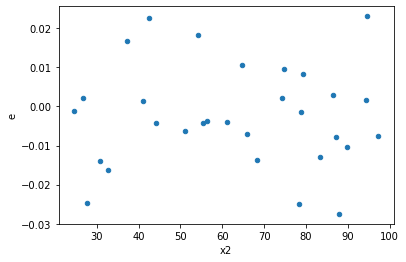

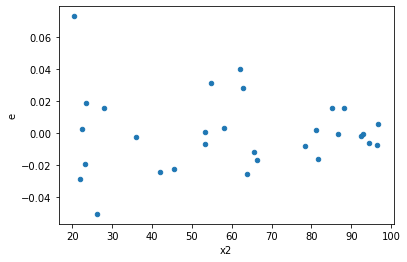

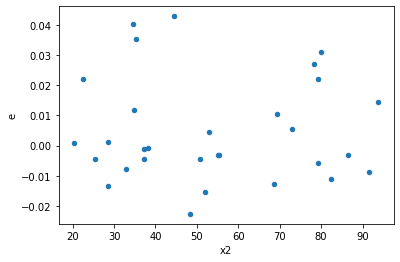

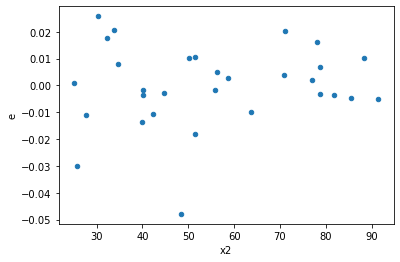

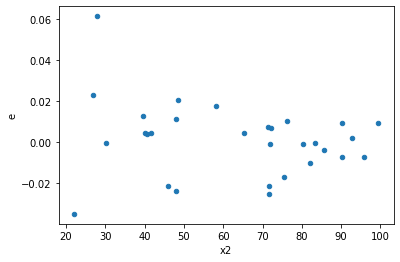

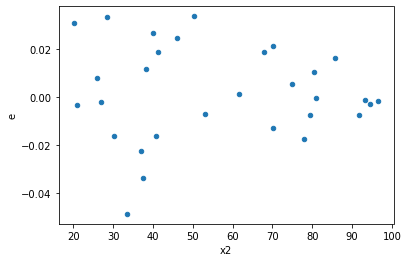

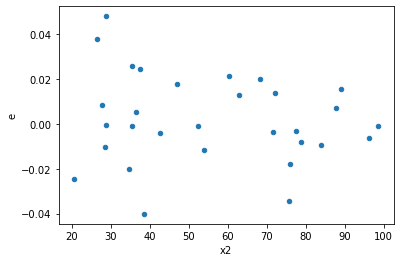

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,9.0,17.0,0.0012850294228011925,0.002437540883110572,0.00014278104697791028,0.00014338475783003363,1.0042282282200714,0.9461506422975252,0.5269246788512374,0.4730753211487626,Reject005=1 : Homoscedasticity
4.0,16.0,10.0,0.003985044633625312,0.010980518024152616,0.000249065289601582,0.0010980518024152615,4.40869060547041,0.02194204738340666,0.9890289763082967,0.01097102369170333,Reject005=0 : Heteroscedasticity
5.0,9.0,17.0,0.0015283657449074862,0.005908951757746882,0.00016981841610083182,0.00034758539751452247,2.0468062622144543,0.19448685459478376,0.9027565727026081,0.09724342729739188,Reject005=1 : Homoscedasticity
10.0,16.0,10.0,0.0032479445240974555,0.004538964463622551,0.00020299653275609097,0.0004538964463622551,2.2359812761316036,0.1992776025886538,0.9003611987056731,0.0996388012943269,Reject005=1 : Homoscedasticity
11.0,13.0,13.0,0.0015617393169850547,0.006916095431340152,0.00012013379361423498,0.0005320073408723193,4.428457013358482,0.011555391412101379,0.9942223042939493,0.0057776957060506895,Reject005=0 : Heteroscedasticity
13.0,15.0,11.0,0.0021842882200828117,0.005097510005235609,0.00014561921467218746,0.00046341000047596447,3.182341022228253,0.05870924402137523,0.9706453779893124,0.029354622010687614,Reject005=1 : Homoscedasticity
14.0,7.0,19.0,0.0006848245862934961,0.0046258724485865555,9.783208375621372e-05,0.00024346697097823978,2.488620927107424,0.10800950098890416,0.9459952495055479,0.05400475049445208,Reject005=1 : Homoscedasticity
15.0,11.0,15.0,0.003349786986324895,0.006596174681818599,0.00030452608966589955,0.00043974497878790657,1.4440305566933784,0.4994797919328855,0.7502601040335573,0.24973989596644275,Reject005=1 : Homoscedasticity
19.0,10.0,16.0,0.004136500599324082,0.014095387814001496,0.0004136500599324082,0.0008809617383750935,2.1297270898958542,0.17142629813250743,0.9142868509337463,0.08571314906625371,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,21.0,0.001916095647679116,0.0023962598434140252,0.0003832191295358232,0.00011410761159114406,0.2977607399958287,0.1826865841340978,Reject005=1 : Homoscedasticity
1.0,14.0,12.0,0.005276064130115177,0.001567022635133135,0.0003768617235796555,0.0001305852195944279,0.34650698498656823,0.06198326373217602,Reject005=1 : Homoscedasticity
2.0,18.0,8.0,0.022129828907010547,0.0007468308774126653,0.0012294349392783638,9.335385967658316e-05,0.07593233012507249,8.655759765601665e-06,Reject005=0 : Heteroscedasticity
3.0,9.0,17.0,0.0012850294228011925,0.002437540883110572,0.00014278104697791028,0.00014338475783003363,1.0042282282200714,0.9461506422975252,Reject005=1 : Homoscedasticity
4.0,16.0,10.0,0.003985044633625312,0.010980518024152616,0.000249065289601582,0.0010980518024152615,4.40869060547041,0.02194204738340666,Reject005=0 : Heteroscedasticity
5.0,9.0,17.0,0.0015283657449074862,0.005908951757746882,0.00016981841610083182,0.00034758539751452247,2.0468062622144543,0.19448685459478376,Reject005=1 : Homoscedasticity
6.0,19.0,7.0,0.005147758777136003,0.0003005076012591348,0.00027093467248084224,4.2929657322733545e-05,0.15845021580163055,0.0012719714858237979,Reject005=0 : Heteroscedasticity
7.0,20.0,6.0,0.0064777225907113965,0.0013640809250874805,0.00032388612953556983,0.00022734682084791342,0.701934414956,0.5084123825789876,Reject005=1 : Homoscedasticity
8.0,19.0,7.0,0.010101794014730752,0.0010644243452356328,0.0005316733691963553,0.00015206062074794754,0.2860038315964424,0.028002549590855748,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      541
Reject005=0 : Heteroscedasticity    459
Name: Result_test, dtype: int64